In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [2]:
df= pd.read_excel(r'D:\ML PROJECTS\Flight price prediction\Data_Train.xlsx')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

# Pre Processing of train data

In [6]:
#Feature Engineering 
df['Date']=df['Date_of_Journey'].str.split('/').str[0].astype(int)
df['Month']=df['Date_of_Journey'].str.split('/').str[1].astype(int)
df['Year']=df['Date_of_Journey'].str.split('/').str[2].astype(int)
df.drop('Date_of_Journey',axis=1, inplace=True)

here i have split the date, month and year and store them as a new attribute and dropped the date of journey feature also convrted the object /string attribute to integer

In [7]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [8]:
#now i am performing FE on Arrival time using lambda function
df['Arrival_Time']=df['Arrival_Time'].apply(lambda x:x.split(' ')[0]) 
df['Hour']=df['Arrival_Time'].apply(lambda x:x.split(':')[0]).astype(int)
df['Minute']=df['Arrival_Time'].apply(lambda x:x.split(':')[1]).astype(int)

In [9]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [10]:
#now i am performing FE on Departure time using lambda function
df['Dep_Time']=df['Dep_Time'].apply(lambda x:x.split(' ')[0]) 
df['Dep_Hour']=df['Dep_Time'].apply(lambda x:x.split(':')[0]).astype(int)
df['Dep_Minute']=df['Dep_Time'].apply(lambda x:x.split(':')[1]).astype(int)

In [11]:
df.drop('Dep_Time', axis=1, inplace=True)

In [12]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Hour,Minute,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50


In [13]:
#now i am performing FE on Duration using lambda function
df['Duration']=df['Duration'].apply(lambda x:x.split('m')[0])
df['Dur_Hour']=df['Duration'].apply(lambda x:x.split('h',)[0]).astype(int)
#df['Dur_Min']=df['Duration'].apply(lambda x:x.split(' ')[0])

In [14]:
df.drop('Duration',axis=1,inplace=True)

In [15]:
df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Hour,Minute,Dep_Hour,Dep_Minute,Dur_Hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,13,15,5,50,7


In [16]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [17]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

In [18]:
df['Total_Stops']=df['Total_Stops'].fillna(-1)

In [19]:
df['Total_Stops']=df['Total_Stops'].astype(int)

In [20]:
df.drop('Route', axis=1,inplace=True)

In [21]:
df.head(3)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Hour,Minute,Dep_Hour,Dep_Minute,Dur_Hour
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,2019,4,25,9,25,19


here what all i have done is i have taken Total_Stops attribute and then convert the unique values into int like one hot Encoding, with the help of mapping after that i dropped the Route attribute because it is also the same as Total stops and not needed any more

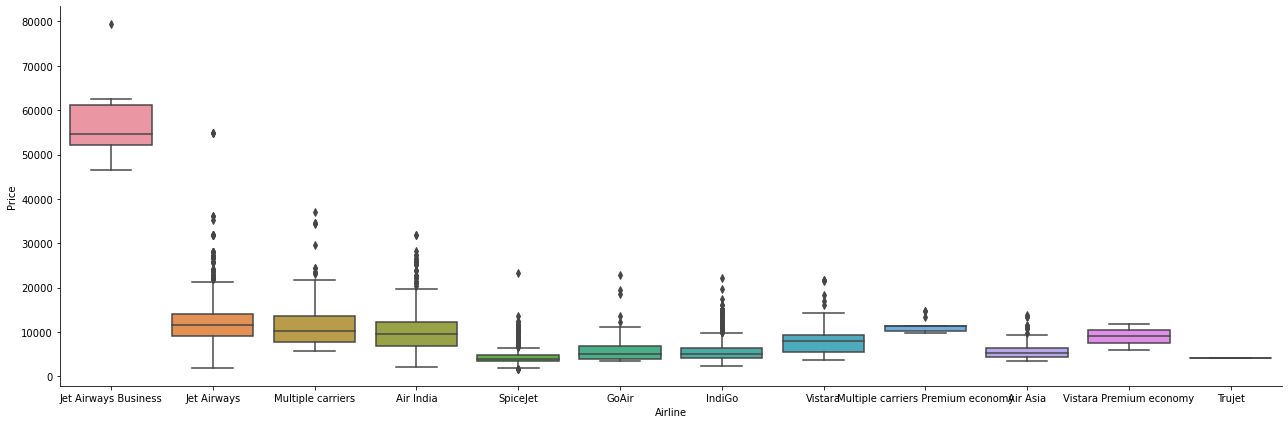

In [22]:
sns.catplot(y='Price', x='Airline', data=df.sort_values("Price", ascending=False),kind="box", height=6, aspect=3)

Here i have plot a graph to check the prices of the fares of each flight tickets and jet airways have highest fares which is also act as outlier 

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Total_Stops      10683 non-null  int32 
 4   Additional_Info  10683 non-null  object
 5   Price            10683 non-null  int64 
 6   Date             10683 non-null  int32 
 7   Month            10683 non-null  int32 
 8   Year             10683 non-null  int32 
 9   Hour             10683 non-null  int32 
 10  Minute           10683 non-null  int32 
 11  Dep_Hour         10683 non-null  int32 
 12  Dep_Minute       10683 non-null  int32 
 13  Dur_Hour         10683 non-null  int32 
dtypes: int32(9), int64(1), object(4)
memory usage: 793.0+ KB


# now rest all features are categorical so i am going for Label ENCODING

In [24]:
le=LabelEncoder()

In [25]:
df['Airline']=le.fit_transform(df['Airline'])
df['Source']=le.fit_transform(df['Source'])
df['Destination']=le.fit_transform(df['Destination'])
df['Additional_Info']=le.fit_transform(df['Additional_Info'])

In [26]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Hour,Minute,Dep_Hour,Dep_Minute,Dur_Hour
0,3,0,5,0,8,3897,24,3,2019,1,10,22,20,2
1,1,3,0,2,8,7662,1,5,2019,13,15,5,50,7
2,4,2,1,2,8,13882,9,6,2019,4,25,9,25,19
3,3,3,0,1,8,6218,12,5,2019,23,30,18,5,5
4,3,0,5,1,8,13302,1,3,2019,21,35,16,50,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0,8,4107,9,4,2019,22,25,19,55,2
10679,1,3,0,0,8,4145,27,4,2019,23,20,20,45,2
10680,4,0,2,0,8,7229,27,4,2019,11,20,8,20,3
10681,10,0,5,0,8,12648,1,3,2019,14,10,11,30,2


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10683 non-null  int32
 1   Source           10683 non-null  int32
 2   Destination      10683 non-null  int32
 3   Total_Stops      10683 non-null  int32
 4   Additional_Info  10683 non-null  int32
 5   Price            10683 non-null  int64
 6   Date             10683 non-null  int32
 7   Month            10683 non-null  int32
 8   Year             10683 non-null  int32
 9   Hour             10683 non-null  int32
 10  Minute           10683 non-null  int32
 11  Dep_Hour         10683 non-null  int32
 12  Dep_Minute       10683 non-null  int32
 13  Dur_Hour         10683 non-null  int32
dtypes: int32(13), int64(1)
memory usage: 626.1 KB


as we can see now each and every attribute it conveted into integer after this the model evaluation will take place

# now i am going to do same for test data

because it will lead to data leakage because when i creating my model by combining train and test data my model will be knowing some of the information about the test data or it will lead to Overfitting 

In [28]:
df_test= pd.read_excel(r'D:\ML PROJECTS\Flight price prediction\Test_set.xlsx')

In [29]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [30]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [31]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

# Pre Processing of test data

In [32]:
#Feature Engineering 
df_test['Date']=df_test['Date_of_Journey'].str.split('/').str[0].astype(int)
df_test['Month']=df_test['Date_of_Journey'].str.split('/').str[1].astype(int)
df_test['Year']=df_test['Date_of_Journey'].str.split('/').str[2].astype(int)
df_test.drop('Date_of_Journey',axis=1, inplace=True)

In [33]:
df_test.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month,Year
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,2019
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5,2019
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,2019
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5,2019
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,2019


In [34]:
#now i am performing FE on Arrival time using lambda function
df_test['Arrival_Time']=df_test['Arrival_Time'].apply(lambda x:x.split(' ')[0]) 
df_test['Hour']=df_test['Arrival_Time'].apply(lambda x:x.split(':')[0]).astype(int)
df_test['Minute']=df_test['Arrival_Time'].apply(lambda x:x.split(':')[1]).astype(int)

In [35]:
df_test.drop('Arrival_Time',axis=1,inplace=True)

In [36]:
#now i am performing FE on Departure time using lambda function
df_test['Dep_Time']=df_test['Dep_Time'].apply(lambda x:x.split(' ')[0]) 
df_test['Dep_Hour']=df_test['Dep_Time'].apply(lambda x:x.split(':')[0]).astype(int)
df_test['Dep_Minute']=df_test['Dep_Time'].apply(lambda x:x.split(':')[1]).astype(int)
df_test.drop('Dep_Time', axis=1, inplace=True)

In [37]:
df_test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Date,Month,Year,Hour,Minute,Dep_Hour,Dep_Minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,2019,4,25,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,2019,10,20,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,2019,19,0,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,2019,21,0,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,2019,2,45,23,55


In [38]:
#now i am performing FE on Duration using lambda function
df_test['Duration']=df_test['Duration'].apply(lambda x:x.split('m')[0])
df_test['Dur_Hour']=df_test['Duration'].apply(lambda x:x.split('h',)[0]).astype(int)
#df['Dur_Min']=df['Duration'].apply(lambda x:x.split(' ')[0])
df_test.drop('Duration',axis=1,inplace=True)

In [39]:
df_test.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Date,Month,Year,Hour,Minute,Dep_Hour,Dep_Minute,Dur_Hour
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,2019,4,25,17,30,10
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,2019,10,20,6,20,4


In [40]:
df_test['Total_Stops']=df_test['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

In [41]:
df_test['Total_Stops']=df_test['Total_Stops'].fillna(-1)

In [42]:
df_test['Total_Stops']=df_test['Total_Stops'].astype(int)

In [43]:
df_test.drop('Route', axis=1,inplace=True)

In [44]:
df_test.head(3)

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Year,Hour,Minute,Dep_Hour,Dep_Minute,Dur_Hour
0,Jet Airways,Delhi,Cochin,1,No info,6,6,2019,4,25,17,30,10
1,IndiGo,Kolkata,Banglore,1,No info,12,5,2019,10,20,6,20,4
2,Jet Airways,Delhi,Cochin,1,In-flight meal not included,21,5,2019,19,0,19,15,23


In [45]:
df_test['Airline']=le.fit_transform(df_test['Airline'])
df_test['Source']=le.fit_transform(df_test['Source'])
df_test['Destination']=le.fit_transform(df_test['Destination'])
df_test['Additional_Info']=le.fit_transform(df_test['Additional_Info'])

In [46]:
df_test.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Year,Hour,Minute,Dep_Hour,Dep_Minute,Dur_Hour
0,4,2,1,1,5,6,6,2019,4,25,17,30,10
1,3,3,0,1,5,12,5,2019,10,20,6,20,4
2,4,2,1,1,3,21,5,2019,19,0,19,15,23
3,6,2,1,1,5,21,5,2019,21,0,8,0,13
4,0,0,2,0,5,24,6,2019,2,45,23,55,2


In [47]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          2671 non-null   int32
 1   Source           2671 non-null   int32
 2   Destination      2671 non-null   int32
 3   Total_Stops      2671 non-null   int32
 4   Additional_Info  2671 non-null   int32
 5   Date             2671 non-null   int32
 6   Month            2671 non-null   int32
 7   Year             2671 non-null   int32
 8   Hour             2671 non-null   int32
 9   Minute           2671 non-null   int32
 10  Dep_Hour         2671 non-null   int32
 11  Dep_Minute       2671 non-null   int32
 12  Dur_Hour         2671 non-null   int32
dtypes: int32(13)
memory usage: 135.8 KB


Now i have perform the feature engineering on both train and test data and converted all the values into int

In [48]:
df_test.shape
#here we dont have price thats why 13 attribute rather than 14

(2671, 13)

In [49]:
df.shape

(10683, 14)

# Feature Selection
in this i will finf out the best attribute which have positive co relation with other features and target variable wih the help of heamap 

In [50]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'Date', 'Month', 'Year', 'Hour', 'Minute', 'Dep_Hour',
       'Dep_Minute', 'Dur_Hour'],
      dtype='object')

In [51]:
x= df.loc[:,['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'Date', 'Month', 'Year', 'Hour', 'Minute', 'Dep_Hour',
       'Dep_Minute', 'Dur_Hour']]

In [52]:
x.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Hour,Minute,Dep_Hour,Dep_Minute,Dur_Hour
0,3,0,5,0,8,3897,24,3,2019,1,10,22,20,2
1,1,3,0,2,8,7662,1,5,2019,13,15,5,50,7
2,4,2,1,2,8,13882,9,6,2019,4,25,9,25,19
3,3,3,0,1,8,6218,12,5,2019,23,30,18,5,5
4,3,0,5,1,8,13302,1,3,2019,21,35,16,50,4


here i have taken all this feature and stored them in independent variable

In [53]:
y= df.iloc[: ,5]

In [54]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

<AxesSubplot:>

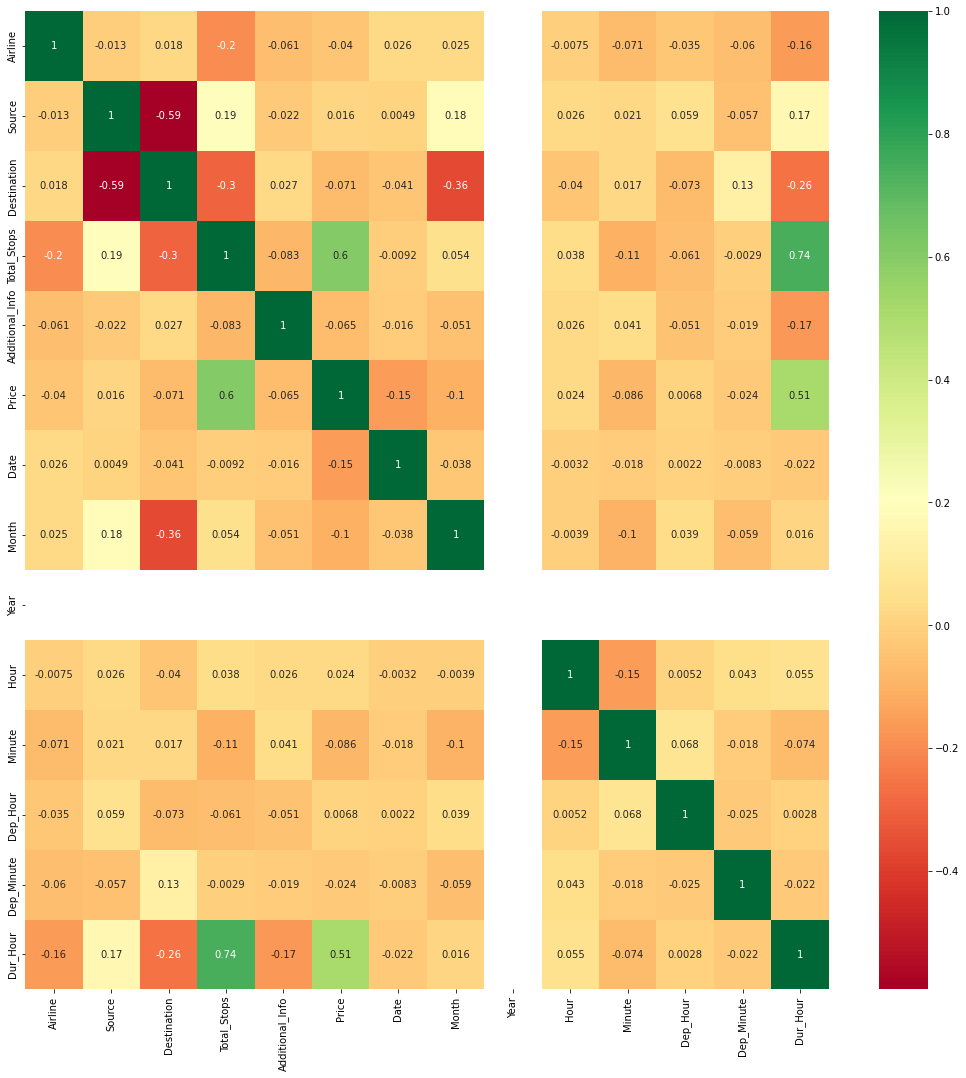

In [55]:
#now i am finding the correlation between independent and dependent features
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), annot= True, cmap='RdYlGn')

if it is towards greener side means highly correlated or positively correlated
if it is towards red side means not correlated or negitively correlated


from this heat map i cn conclude that Total Stops is playing the most important features for predicting the price

# Fitting the model using Random Forest

1. splitting the model into train test split for prediction wrt to x

There is no need to do Scaling in Random Forest

and after this i will fin the rmse score

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2 , random_state= 42)

In [58]:
print(x_train.shape, x_test.shape)

(8546, 14) (2137, 14)


In [59]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [60]:
y_pred=rf.predict(x_test)

In [61]:
y_pred

array([10844.  ,  4959.12, 14781.  , ...,  7451.29,  4823.  , 13730.96])

In [62]:
from sklearn.metrics import r2_score

In [63]:
r2_score(y_test, y_pred)

0.9995069404286073

In [64]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [65]:
a=mean_absolute_percentage_error(y_test, y_pred)

In [66]:
a

0.020538716946552973

In [67]:
rf.score(x_test,y_test)

0.9995069404286073